In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, SmartCorrelatedSelection
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten

from sklearn.preprocessing import LabelEncoder, label_binarize
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

2025-05-18 17:32:21.189639: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747589541.208249 3728760 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747589541.213993 3728760 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-18 17:32:21.234335: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(tf.__version__)

2.18.0


In [ ]:
train = pd.read_csv("train_QNN.csv")
val = pd.read_csv("val_QNN.csv")
test = pd.read_csv("test_QNN.csv")

In [3]:
# Separar características y etiquetas para conjunto de entrenamiento
X_train = train.drop(columns=['category'])
y_train = train['category']

# Separar características y etiquetas para conjunto de entrenamiento
X_test = test.drop(columns=['category'])
y_test = test['category']

X_val = val.drop(columns=['category'])
y_val = val['category']

In [4]:
X_train.shape, X_test.shape, X_val.shape

((1117830, 15), (319400, 15), (159690, 15))

In [5]:
# Normalización del conjunto de datos
norm = StandardScaler()

X_train = norm.fit_transform(X_train)
X_val = norm.fit_transform(X_val)
X_test = norm.fit_transform(X_test)

#Codificacion de etiquetas (Numéricas)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

# Convertir las etiquetas codificadas a codificación one-hot (10 columnas por muestras)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=10)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=10)
y_val_one_hot = to_categorical(y_val_encoded, num_classes=10)

In [6]:
model_filepath = 'Model15Feat/model-{epoch:02d}-{val_accuracy:.4f}.keras'
checkpoint = ModelCheckpoint(
    filepath = model_filepath,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True,
    #verbose = 1
)

In [7]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(400, activation='relu'),
    Dropout(0.3),
    Dense(400, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

batch = 600
steps_per_epoch = len(X_train) // batch
validation_steps = len(X_val) // batch

# Entrenar el modelo
history = model.fit(X_train,
                    y_train_one_hot,
                    epochs=100, batch_size=batch,
                    validation_data=(X_val, y_val_one_hot),
                    steps_per_epoch = steps_per_epoch,
                    validation_steps = validation_steps,
                    callbacks=[checkpoint])


/home/iraizozj/entorno/entorno/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1746035697.030075 2681150 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38484 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1746035697.031724 2681150 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38484 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1746035697.033326 2681150 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 38484 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40G

Epoch 1/100


I0000 00:00:1746035699.373000 2681642 service.cc:148] XLA service 0x7f5b6c00dc40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746035699.373033 2681642 service.cc:156]   StreamExecutor device (0): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
I0000 00:00:1746035699.373040 2681642 service.cc:156]   StreamExecutor device (1): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
I0000 00:00:1746035699.373043 2681642 service.cc:156]   StreamExecutor device (2): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
I0000 00:00:1746035699.373047 2681642 service.cc:156]   StreamExecutor device (3): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
2025-04-30 17:54:59.418581: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746035699.573936 2681642 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-30 17:55:01.329595: I external/local_xla

  92/1863 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4781 - loss: 1.4115

I0000 00:00:1746035703.716297 2681642 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1838/1863 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6202 - loss: 0.8651

2025-04-30 17:55:07.965670: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_58', 52 bytes spill stores, 52 bytes spill loads

2025-04-30 17:55:07.981446: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_58', 48 bytes spill stores, 48 bytes spill loads

2025-04-30 17:55:07.986517: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_65', 340 bytes spill stores, 340 bytes spill loads

2025-04-30 17:55:07.994050: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_65', 24 bytes spill stores, 24 bytes spill loads

2025-04-30 17:55:07.994647: I external/local_xla/xla/stream_execut

1863/1863 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6206 - loss: 0.8639 - val_accuracy: 0.6832 - val_loss: 0.7127
Epoch 2/100
   1/1863 ━━━━━━━━━━━━━━━━━━━━ 1:10:21 2s/step - accuracy: 0.6000 - loss: 0.7150

/home/iraizozj/entorno/entorno/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1863/1863 ━━━━━━━━━━━━━━━━━━━━ 3s 236us/step - accuracy: 0.6000 - loss: 0.7150 - val_accuracy: 0.6762 - val_loss: 0.7267
Epoch 3/100
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6819 - loss: 0.7093 - val_accuracy: 0.6846 - val_loss: 0.6976
Epoch 4/100
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - accuracy: 0.7333 - loss: 0.7094 - val_accuracy: 0.6884 - val_loss: 0.6950
Epoch 5/100
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6975 - loss: 0.6734 - val_accuracy: 0.7013 - val_loss: 0.6723
Epoch 6/100
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - accuracy: 0.8000 - loss: 0.5634 - val_accuracy: 0.7034 - val_loss: 0.6657
Epoch 7/100
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7068 - loss: 0.6505 - val_accuracy: 0.6913 - val_loss: 0.6886
Epoch 8/100
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step - accuracy: 0.6000 - loss: 0.6429 - val_accuracy: 0.6980 - val_loss: 0.6659
Epoch 9/100
1863/1863 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7109 - loss: 0.639

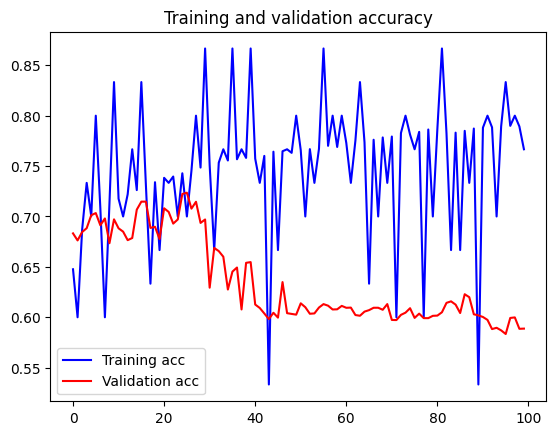

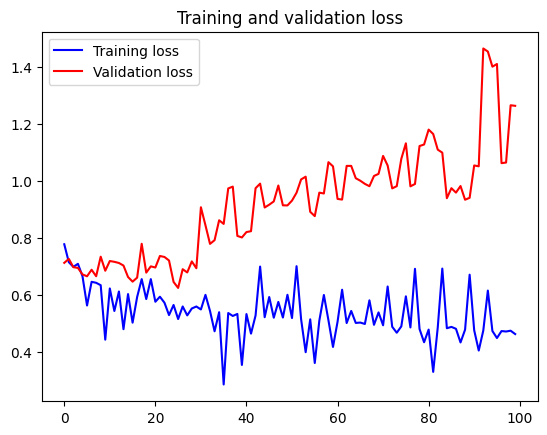

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
#Importamos el modelo con mayor accuracy en validacion
MLP1 = load_model('Model15Feat/model-26-0.7236.keras')

In [19]:
y_pred_proba = MLP1.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

9982/9982 ━━━━━━━━━━━━━━━━━━━━ 10s 900us/step


In [20]:
# Calcular la precisión
accuracy = accuracy_score(y_test_encoded, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.6920538509705698


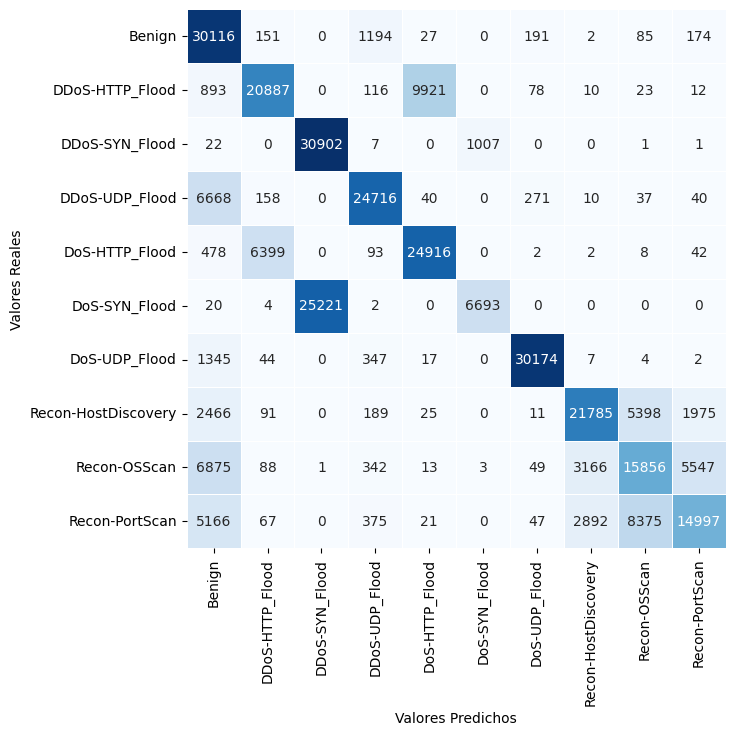

In [21]:
cm = metrics.confusion_matrix(y_test_encoded, y_pred)
normalized_matrix = cm #/ cm.sum(axis=1, keepdims=True)

class_names = ['Benign', 'DDoS-HTTP_Flood', 'DDoS-SYN_Flood', 'DDoS-UDP_Flood', 'DoS-HTTP_Flood', 'DoS-SYN_Flood', 'DoS-UDP_Flood', 'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan']

sns.heatmap(normalized_matrix, annot = True, fmt = '0.0f', linewidth=0.5, xticklabels=class_names,
            yticklabels=class_names, square = True, cmap='Blues', cbar = False)

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()

In [2]:
train = pd.read_csv("train_QNN2.csv")
val = pd.read_csv("val_QNN2.csv")
test = pd.read_csv("test_QNN2.csv")

In [3]:
porcentaje_mantener = 0.1

train_reducido_udp = train[train['proto'] == 1].groupby('category').sample(frac=porcentaje_mantener)
train_reducido_tcp = train[train['proto'] == 0].groupby('category').sample(frac=porcentaje_mantener)

train = pd.concat([train_reducido_udp, train_reducido_tcp])

val_reducido_udp = val[val['proto'] == 1].groupby('category').sample(frac=porcentaje_mantener)
val_reducido_tcp = val[val['proto'] == 0].groupby('category').sample(frac=porcentaje_mantener)

val = pd.concat([val_reducido_udp, val_reducido_tcp])

test_reducido_udp = test[test['proto'] == 1].groupby('category').sample(frac=porcentaje_mantener)
test_reducido_tcp = test[test['proto'] == 0].groupby('category').sample(frac=porcentaje_mantener)

test = pd.concat([test_reducido_udp, test_reducido_tcp])

In [4]:
# Separar características y etiquetas para conjunto de entrenamiento
X_train = train.drop(columns=['category'])
y_train = train['category']

# Separar características y etiquetas para conjunto de entrenamiento
X_test = test.drop(columns=['category'])
y_test = test['category']

X_val = val.drop(columns=['category'])
y_val = val['category']

In [5]:
X_train.shape, X_test.shape, X_val.shape

((111783, 16), (31940, 16), (15970, 16))

In [6]:
# Normalización del conjunto de datos
norm = StandardScaler()

X_train = norm.fit_transform(X_train)
X_val = norm.fit_transform(X_val)
X_test = norm.fit_transform(X_test)

#Codificacion de etiquetas (Numéricas)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

# Convertir las etiquetas codificadas a codificación one-hot (10 columnas por muestras)
y_train_one_hot = to_categorical(y_train_encoded, num_classes=10)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=10)
y_val_one_hot = to_categorical(y_val_encoded, num_classes=10)

In [7]:
model_filepath = 'Model15FeatR/model-{epoch:02d}-{val_accuracy:.4f}.keras'
checkpoint = ModelCheckpoint(
    filepath = model_filepath,
    monitor = 'val_accuracy',
    mode = 'max',
    save_best_only = True,
    #verbose = 1
)

In [8]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(400, activation='relu'),
    Dropout(0.3),
    Dense(400, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

batch = 50
steps_per_epoch = len(X_train) // batch
validation_steps = len(X_val) // batch

# Entrenar el modelo
history = model.fit(X_train,
                    y_train_one_hot,
                    epochs=50, batch_size=batch,
                    validation_data=(X_val, y_val_one_hot),
                    steps_per_epoch = steps_per_epoch,
                    validation_steps = validation_steps,
                    callbacks=[checkpoint])


/home/iraizozj/entorno/entorno/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1746200863.467203 2764785 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38484 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
I0000 00:00:1746200863.469021 2764785 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38484 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1746200863.470514 2764785 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 38484 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40G

Epoch 1/50


I0000 00:00:1746200865.629480 2765144 service.cc:148] XLA service 0x7fb69000bd00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746200865.629510 2765144 service.cc:156]   StreamExecutor device (0): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
I0000 00:00:1746200865.629514 2765144 service.cc:156]   StreamExecutor device (1): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
I0000 00:00:1746200865.629517 2765144 service.cc:156]   StreamExecutor device (2): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
I0000 00:00:1746200865.629520 2765144 service.cc:156]   StreamExecutor device (3): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
2025-05-02 15:47:45.672421: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746200865.823433 2765144 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-02 15:47:47.195012: I external/local_xla

  90/2235 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4490 - loss: 1.5741

I0000 00:00:1746200868.606045 2765144 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2218/2235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5995 - loss: 0.9315

2025-05-02 15:47:53.155918: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_58', 48 bytes spill stores, 48 bytes spill loads

2025-05-02 15:47:53.223478: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_65', 48 bytes spill stores, 48 bytes spill loads

2025-05-02 15:47:53.239781: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_58_0', 28 bytes spill stores, 28 bytes spill loads

2025-05-02 15:47:53.242586: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_58', 112 bytes spill stores, 112 bytes spill loads

2025-05-02 15:47:53.256177: I external/local_xla/xla/stream_exec

2235/2235 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5997 - loss: 0.9307 - val_accuracy: 0.6266 - val_loss: 0.7710
Epoch 2/50


2025-05-02 15:47:56.539129: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1123', 60 bytes spill stores, 60 bytes spill loads



   1/2235 ━━━━━━━━━━━━━━━━━━━━ 1:40:26 3s/step - accuracy: 0.6364 - loss: 0.8638

/home/iraizozj/entorno/entorno/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2235/2235 ━━━━━━━━━━━━━━━━━━━━ 3s 239us/step - accuracy: 0.6364 - loss: 0.8638 - val_accuracy: 0.6273 - val_loss: 0.7718
Epoch 3/50
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6423 - loss: 0.7737 - val_accuracy: 0.6629 - val_loss: 0.7334
Epoch 4/50
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step - accuracy: 0.7576 - loss: 0.5344 - val_accuracy: 0.6631 - val_loss: 0.7330
Epoch 5/50
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6578 - loss: 0.7465 - val_accuracy: 0.6508 - val_loss: 0.7215
Epoch 6/50
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 0s 190us/step - accuracy: 0.7879 - loss: 0.6046 - val_accuracy: 0.6515 - val_loss: 0.7203
Epoch 7/50
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6672 - loss: 0.7279 - val_accuracy: 0.6828 - val_loss: 0.7070
Epoch 8/50
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 0s 199us/step - accuracy: 0.5758 - loss: 0.7766 - val_accuracy: 0.6829 - val_loss: 0.7046
Epoch 9/50
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6740 - loss: 0.7148 - val

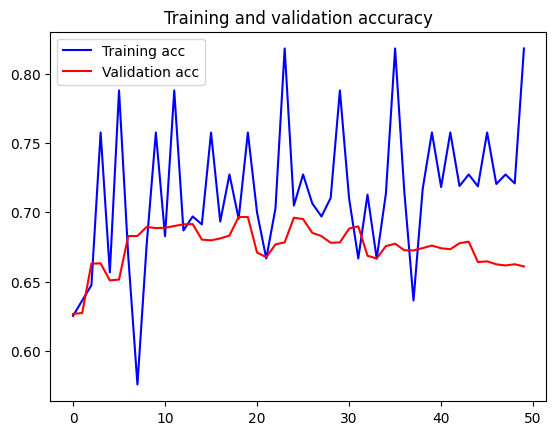

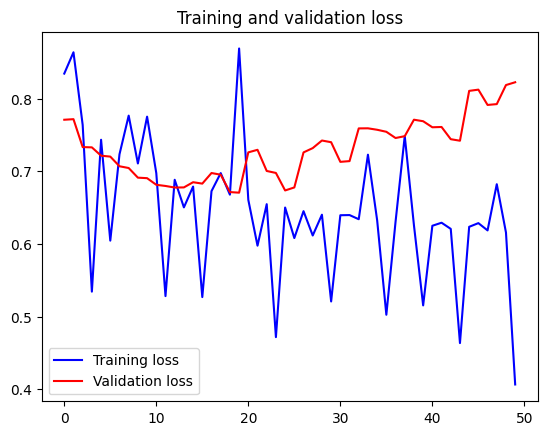

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
#Importamos el modelo con mayor accuracy en validacion
MLP1 = load_model('Model15FeatR/model-19-0.6967.keras')

In [11]:
y_pred_proba = MLP1.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

2025-05-02 15:52:08.204276: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 12 bytes spill stores, 12 bytes spill loads

2025-05-02 15:52:08.315862: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_27', 156 bytes spill stores, 156 bytes spill loads

2025-05-02 15:52:08.316782: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 4 bytes spill stores, 4 bytes spill loads

2025-05-02 15:52:08.331290: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_27', 12 bytes spill stores, 12 bytes spill loads

2025-05-02 15:52:08.453677: I external/local_xla/xla/stream_executor

954/999 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step

2025-05-02 15:52:11.050849: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 332 bytes spill stores, 332 bytes spill loads

2025-05-02 15:52:11.051413: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_27', 328 bytes spill stores, 416 bytes spill loads



999/999 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


In [12]:
# Calcular la precisión
accuracy = accuracy_score(y_test_encoded, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.6888541014402004


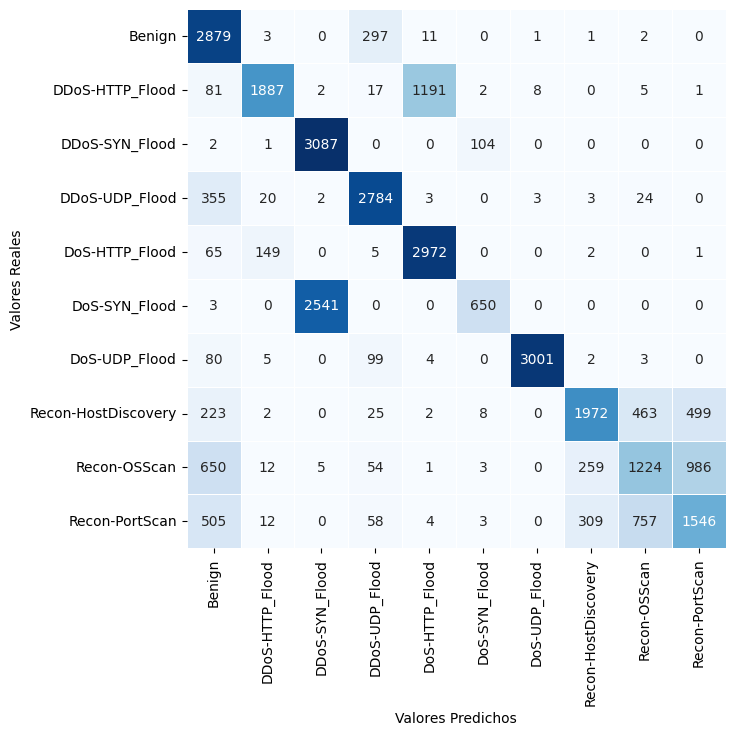

In [13]:
cm = metrics.confusion_matrix(y_test_encoded, y_pred)
normalized_matrix = cm #/ cm.sum(axis=1, keepdims=True)

class_names = ['Benign', 'DDoS-HTTP_Flood', 'DDoS-SYN_Flood', 'DDoS-UDP_Flood', 'DoS-HTTP_Flood', 'DoS-SYN_Flood', 'DoS-UDP_Flood', 'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan']

sns.heatmap(normalized_matrix, annot = True, fmt = '0.0f', linewidth=0.5, xticklabels=class_names,
            yticklabels=class_names, square = True, cmap='Blues', cbar = False)

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()

In [14]:
X_train = pd.DataFrame(X_train, columns=train.columns[:-1])
X_val = pd.DataFrame(X_val, columns=val.columns[:-1])
X_test = pd.DataFrame(X_test, columns=test.columns[:-1])

In [15]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
train = pd.concat([X_train, y_train], axis=1)

X_val= X_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
val = pd.concat([X_val, y_val], axis=1)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
test = pd.concat([X_test, y_test], axis=1)

In [16]:
train.to_csv('train_QNN3.csv', index=False)
test.to_csv('test_QNN3.csv', index=False)
val.to_csv('val_QNN3.csv', index=False)